In [3]:
import os
import numpy as np
import torch
from torch.optim import Adam
from torchvision import models
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable



class Net(nn.Module):
    def __init__(self,):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, (3,6))
        self.norm1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(3, 6)
        self.conv2 = nn.Conv2d(64, 32, (3,6))
        self.norm2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(3, 6)
        self.conv3 = nn.Conv2d(32, 32, (3,6))
        self.norm3 = nn.BatchNorm2d(32)
        self.pool3 = nn.MaxPool2d(3,6)
        self.fc1 = nn.Linear(192, 50)
        self.dropout = nn.Dropout2d(p=0.2)
        self.fc2 = nn.Linear(64, 50)
        self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.conv1(x)
        x = self.norm1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.norm2(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.norm3(x)
        x = F.relu(x)
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = self.softmax(x)
        return x

In [4]:
model = torch.load("../model_40.pt", map_location=torch.device('cpu'))
print(model)

Net(
  (conv1): Conv2d(1, 64, kernel_size=(3, 6), stride=(1, 1))
  (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=3, stride=6, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 32, kernel_size=(3, 6), stride=(1, 1))
  (norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=3, stride=6, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 32, kernel_size=(3, 6), stride=(1, 1))
  (norm3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=3, stride=6, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=192, out_features=50, bias=True)
  (dropout): Dropout2d(p=0.2, inplace=False)
  (fc2): Linear(in_features=64, out_features=50, bias=True)
  (softmax): Softmax(dim=None)
)


In [5]:
print(*list(model.children()))

Conv2d(1, 64, kernel_size=(3, 6), stride=(1, 1)) BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) MaxPool2d(kernel_size=3, stride=6, padding=0, dilation=1, ceil_mode=False) Conv2d(64, 32, kernel_size=(3, 6), stride=(1, 1)) BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) MaxPool2d(kernel_size=3, stride=6, padding=0, dilation=1, ceil_mode=False) Conv2d(32, 32, kernel_size=(3, 6), stride=(1, 1)) BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) MaxPool2d(kernel_size=3, stride=6, padding=0, dilation=1, ceil_mode=False) Linear(in_features=192, out_features=50, bias=True) Dropout2d(p=0.2, inplace=False) Linear(in_features=64, out_features=50, bias=True) Softmax(dim=None)


## Forward Visualization

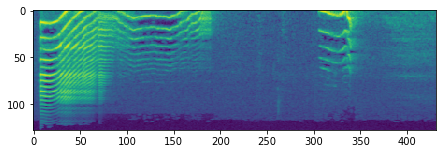

In [36]:
# original spectrogram
example_path = "../input_images/1-51805-C-33.npy"
im = np.load(example_path)
plt.cla()
ax = plt.imshow(im)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)
plt.savefig("../output/original_image.jpg")

In [37]:
# first conv
X = np.expand_dims(im, axis=0)
X = np.expand_dims(X, axis=0)
X = torch.from_numpy(X)
X = Variable(X, requires_grad=False)
conv1 = nn.Sequential(*list(model.children()))[0]
X = conv1(X)

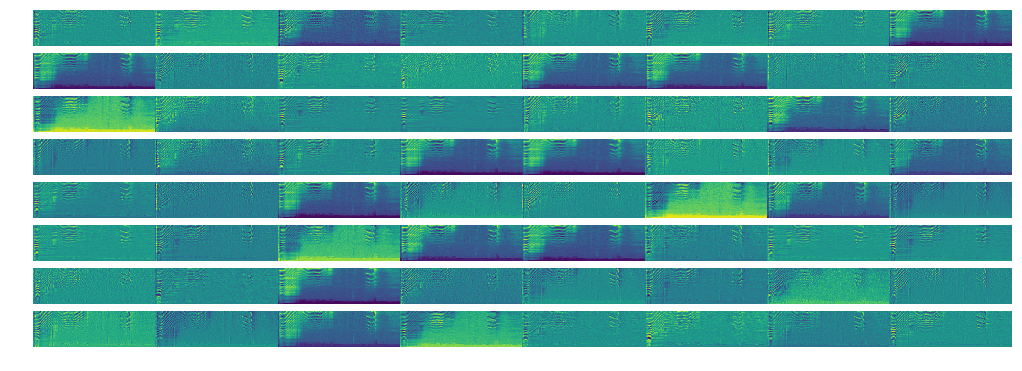

In [38]:
conv1_X = X.detach().numpy()[0]
num_filter = conv1_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(8,8,i+1)
    ax.axis('off')
    ax = plt.imshow(conv1_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)
plt.savefig("../output/conv1.jpg")

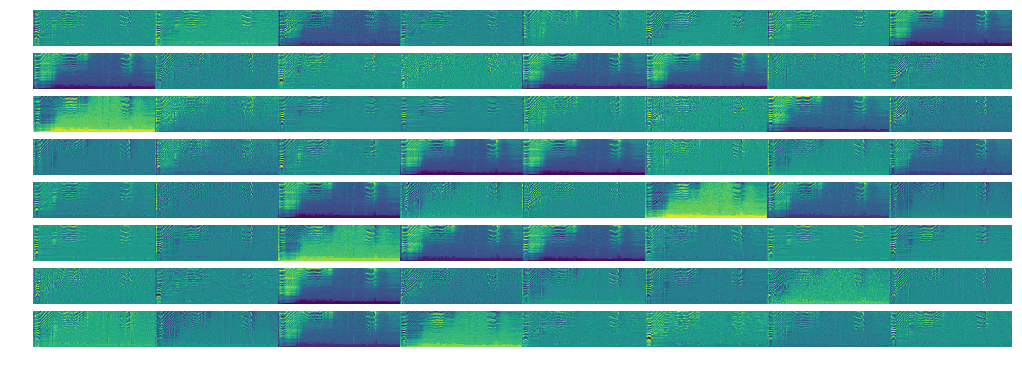

In [39]:
# norm1
norm1 = nn.Sequential(*list(model.children()))[1]
X = norm1(X)
norm1_X = X.detach().numpy()[0]
num_filter = norm1_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(8,8,i+1)
    ax.axis('off')
    ax = plt.imshow(norm1_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)
plt.savefig("../output/norm1.jpg")

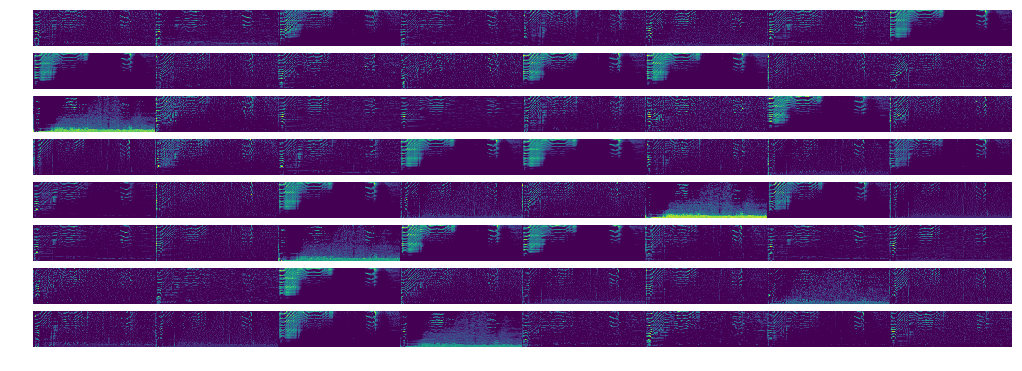

In [40]:
# relu1
X = F.relu(X)
relu1_X = X.detach().numpy()[0]
num_filter = relu1_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(8,8,i+1)
    ax.axis('off')
    ax = plt.imshow(relu1_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)
plt.savefig("../output/relu1.jpg")

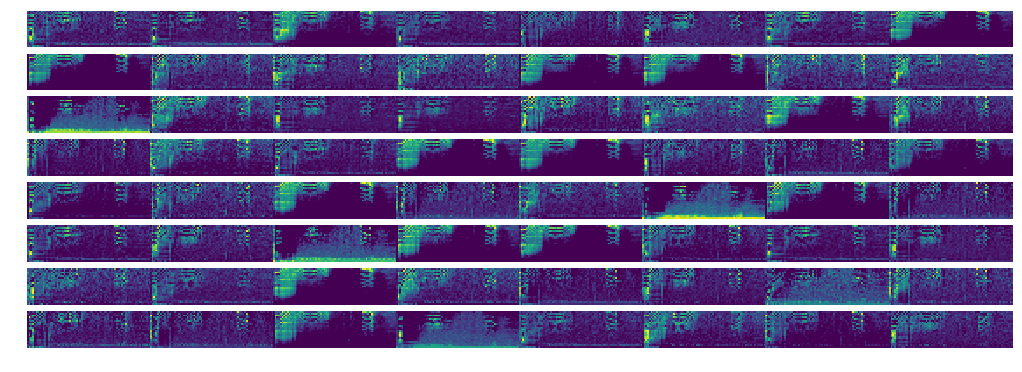

In [41]:
# pool1
pool1 = nn.Sequential(*list(model.children()))[2]
X = pool1(X)
pool1_X = X.detach().numpy()[0]
num_filter = pool1_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(8,8,i+1)
    ax.axis('off')
    ax = plt.imshow(pool1_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)
plt.savefig("../output/pool1.jpg")

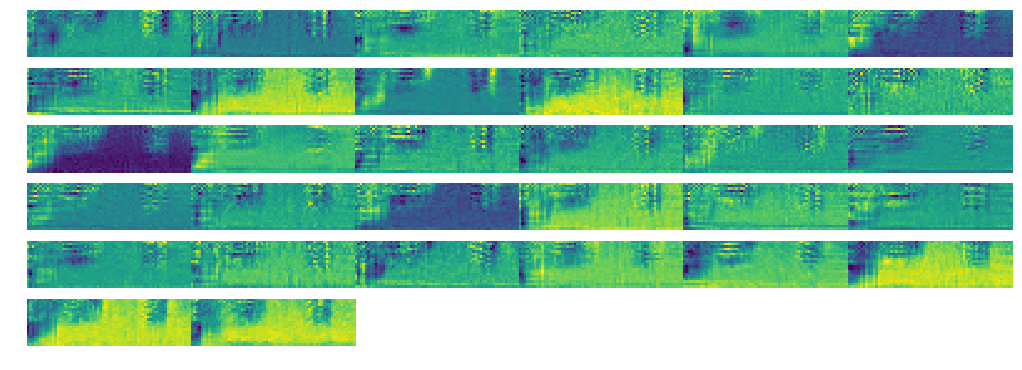

In [42]:
# conv2
conv2 = nn.Sequential(*list(model.children()))[3]
X = conv2(X)
conv2_X = X.detach().numpy()[0]
num_filter = conv2_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(6,6,i+1)
    ax.axis('off')
    ax = plt.imshow(conv2_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)
plt.savefig("../output/conv2.jpg")

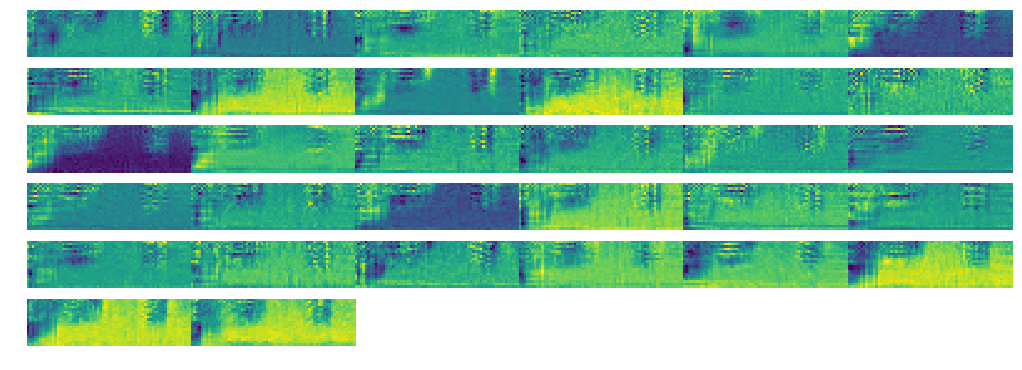

In [43]:
# norm2
norm2 = nn.Sequential(*list(model.children()))[4]
X = norm2(X)
norm2_X = X.detach().numpy()[0]
num_filter = norm2_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(6,6,i+1)
    ax.axis('off')
    ax = plt.imshow(norm2_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)
plt.savefig("../output/norm2.jpg")

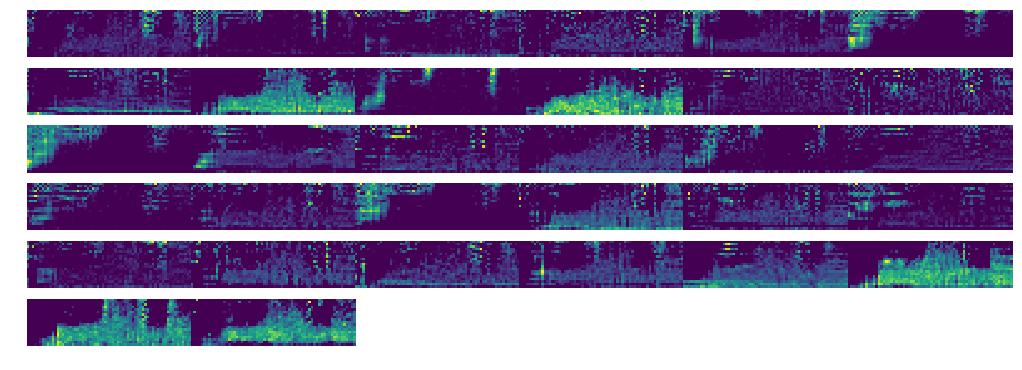

In [44]:
# relu2
X = F.relu(X)
relu2_X = X.detach().numpy()[0]
num_filter = relu2_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(6,6,i+1)
    ax.axis('off')
    ax = plt.imshow(relu2_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)
plt.savefig("../output/relu2.jpg")

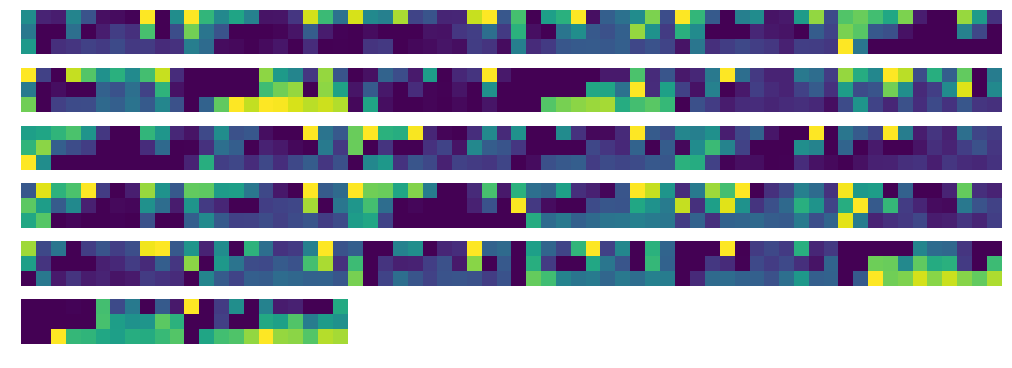

In [45]:
# pool2
pool2 = nn.Sequential(*list(model.children()))[5]
X = pool2(X)
pool2_X = X.detach().numpy()[0]
num_filter = pool2_X.shape[0]
f = plt.figure(figsize=(14,5))
for i in range(num_filter):
    ax = f.add_subplot(6,6,i+1)
    ax.axis('off')
    ax = plt.imshow(pool2_X[i,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)
plt.savefig("../output/pool2.jpg")

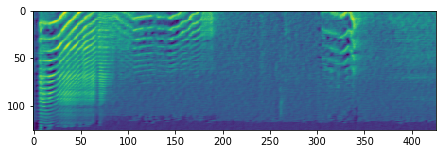

In [123]:

ax = plt.imshow(conv1_X[38,:,:])
# plt.tight_layout()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(hspace=0, wspace =0)
plt.savefig("../output/conv1_38.jpg")

## Visualize CNN Filters

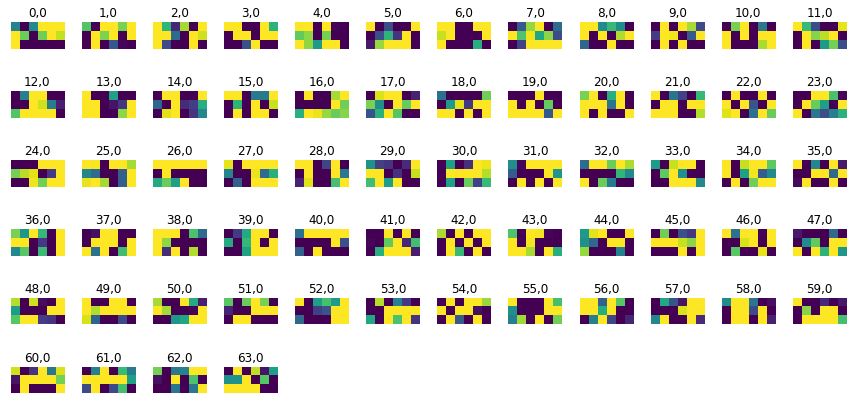

In [46]:
from vis_filters import *
plot_weights(model, 0, single_channel = True)

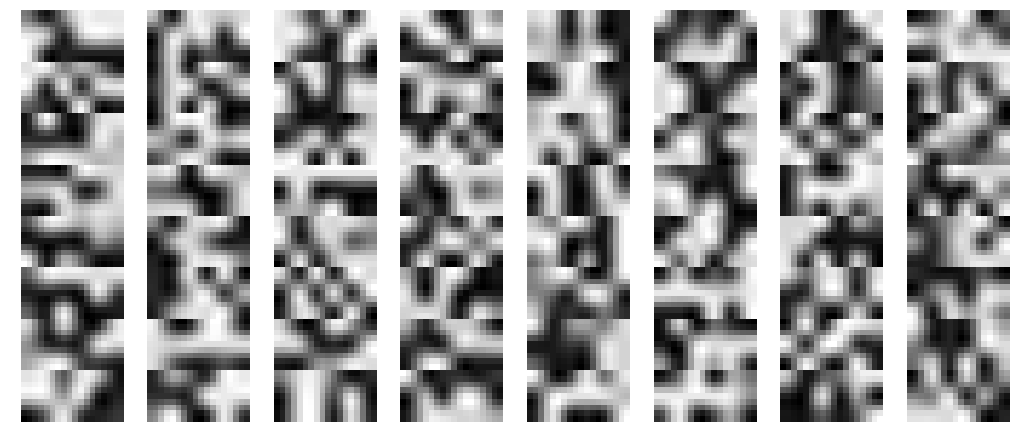

In [77]:
from scipy.interpolate import griddata
import cv2
def make_interpolated_image(im, nsamples):
    
#     print(nsamples)
    nx, ny = im.shape[1], im.shape[0]
    X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))
    ix = np.random.randint(nx, size=nsamples)
    iy = np.random.randint(ny, size=nsamples)
    samples = im[iy,ix]
    int_im = griddata((iy, ix), samples, (Y, X))
    return int_im

# # Read in image and convert to greyscale array object
# img_name = sys.argv[1]
# im = Image.open(img_name)
# im = np.array(im.convert('L'))

# # A meshgrid of pixel coordinates
# nx, ny = im.shape[1], im.shape[0]
# X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))

# # Create a figure of nrows x ncols subplots, and orient it appropriately
# # for the aspect ratio of the image.
# nrows, ncols = 2, 2
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,4), dpi=100)
# if nx < ny:
#     w, h = fig.get_figwidth(), fig.get_figheight()
#     fig.set_figwidth(h), fig.set_figheight(w)

# # Convert an integer i to coordinates in the ax array
# get_indices = lambda i: (i // nrows, i % ncols)

# # Sample 100, 1,000, 10,000 and 100,000 points and plot the interpolated
# # images in the figure
# for i in range(4):
#     nsamples = 10**(i+2)
#     axes = ax[get_indices(i)]
#     axes.imshow(make_interpolated_image(nsamples),
#                           cmap=plt.get_cmap('Greys_r'))
#     axes.set_xticks([])
#     axes.set_yticks([])
#     axes.set_title('nsamples = {0:d}'.format(nsamples))
# filestem = os.path.splitext(os.path.basename(img_name))[0]
# plt.savefig('{0:s}_interp.png'.format(filestem), dpi=100)


def plot_filters_single_channel(t):
    
    #kernels depth * number of kernels
    t = t[:, 0, :, :]
#     nplots = t.shape[0]
#     ncols = 12
    
    
#     nrows = 1 + nplots//ncols
    #convert tensor to numpy image
#     npimg = np.array(t.numpy(), np.float32)
    count = 0
    fig = plt.figure(figsize=(14, 6))
    
    #looping through all the kernels in each channel
    for i in range(t.shape[0]):
        for j in range(1):
            count += 1
            ax = fig.add_subplot(8, 8, count)
            npimg = np.array(t[i,:,:].numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
#             print(npimg)
#             npimg = make_interpolated_image(npimg, 100)
            npimg = cv2.resize(npimg, dsize=(18, 9), interpolation=cv2.INTER_CUBIC)
            ax.axis('off')
            ax = plt.imshow(npimg,cmap="gray")
#             ax1.set_title(str(i) + ',' + str(j))
#             ax1.set_xticklabels([])
#             ax1.set_yticklabels([])
   
    plt.tight_layout(pad=0, w_pad=0, h_pad=0)
    plt.subplots_adjust(hspace=0, wspace =0.1)
    plt.savefig("../output/filter1.jpg")
    
def plot_weights(model, layer_num, single_channel = True, collated = False):
    
    weight_tensor = nn.Sequential(*list(model.children()))[layer_num].weight.data
    
    if single_channel:
        plot_filters_single_channel(weight_tensor)
        

        
plot_weights(model, 0, single_channel = True)



## Gradient * Image

### 1. Vanilla Gradient

In [85]:
class VanillaBackprop():
    """
        Produces gradients generated with vanilla back propagation from the image
    """
    def __init__(self, model):
        self.model = model
        self.gradients = None
        # Put model in evaluation mode
        self.model.eval()
        # Hook the first layer to get the gradient
        self.hook_layers()

    def hook_layers(self):
        def hook_function(module, grad_in, grad_out):
            self.gradients = grad_in[0]

        # Register hook to the first layer
        first_layer = nn.Sequential(*list(model.children()))[0]
#         first_layer = list(self.model.features._modules.items())[0][1]
        first_layer.register_backward_hook(hook_function)

    def generate_gradients(self, input_image, target_class):
        model_output = self.model(input_image)
        self.model.zero_grad()
        # Target for backprop
        one_hot_output = torch.FloatTensor(1, model_output.size()[-1]).zero_()
        one_hot_output[0][target_class] = 1
        # Backward pass
        model_output.backward(gradient=one_hot_output)
        gradients_as_arr = self.gradients.data.numpy()[0]
        return gradients_as_arr

In [79]:
def convert_to_grayscale(im_as_arr):
    """
        Converts 3d image to grayscale
    Args:
        im_as_arr (numpy arr): RGB image with shape (D,W,H)
    returns:
        grayscale_im (numpy_arr): Grayscale image with shape (1,W,D)
    """
    grayscale_im = np.sum(np.abs(im_as_arr), axis=0)
    im_max = np.percentile(grayscale_im, 99)
    im_min = np.min(grayscale_im)
    grayscale_im = (np.clip((grayscale_im - im_min) / (im_max - im_min), 0, 1))
    grayscale_im = np.expand_dims(grayscale_im, axis=0)
    return grayscale_im

In [80]:
def save_gradient_images(gradient, file_name="", grayscale=True):
    """
        Exports the original gradient image
    Args:
        gradient (np arr): Numpy array of the gradient with shape (3, 224, 224)
        file_name (str): File name to be exported
    """
    # Normalize
    gradient = gradient - gradient.min()
    gradient /= gradient.max()
    path_to_file = os.path.join('../output/', file_name + '.jpg')
    gradient = gradient[0,:,:]
    if grayscale:
        plt.imshow(gradient, cmap='gray')
    else:
        plt.imshow(gradient)
    plt.savefig(path_to_file)

    return gradient

In [125]:
def get_example_params():
    
    example_list = ['../input_images/1-51805-C-33.npy',]  # '../input_images/1-51805-D-33.npy', '../input_images/5-161270-B-33.npy'

#     example_list = ['../input_images/5-161270-B-33.npy']
    for filepath in example_list:
        prep_img = np.load(filepath)
        target_class = 33
    
    return (prep_img, target_class)


output_dir = "../output/"
prep_img, target_class =get_example_params()
prep_img = np.expand_dims(prep_img, axis=0)
prep_img = np.expand_dims(prep_img, axis=0)
prep_img = torch.from_numpy(prep_img)
prep_img = Variable(prep_img, requires_grad=True)
model = torch.load("../CNN_Non_Hierarchical.pt")
VBP = VanillaBackprop(model)
vanilla_grads = VBP.generate_gradients(prep_img, target_class)
grad_times_image = vanilla_grads[0] * prep_img.detach().numpy()[0]
grayscale_vanilla_grads = convert_to_grayscale(grad_times_image)

im = save_gradient_images(grayscale_vanilla_grads,'Vanilla_grad_times_image_gray_color', False)

AttributeError: 'Net' object has no attribute 'norm1'

### 2. Guided Gradient

In [83]:
class GuidedBackprop():
    """
       Produces gradients generated with guided back propagation from the given image
    """
    def __init__(self, model):
        self.model = model
        self.gradients = None
        self.forward_relu_outputs = []
        # Put model in evaluation mode
        self.model.eval()
        self.update_relus()
        self.hook_layers()

    def hook_layers(self):
        def hook_function(module, grad_in, grad_out):
            self.gradients = grad_in[0]
        # Register hook to the first layer
        first_layer = weight_tensor = nn.Sequential(*list(model.children())[:4])[0]
#         first_layer = list(self.model.features._modules.items())[0][1]
#         first_layer.register_backward_hook(hook_function)
    
#         first_layer = list(self.model.features._modules.items())[0][1]
        first_layer.register_backward_hook(hook_function)

    def update_relus(self):

        def relu_backward_hook_function(module, grad_in, grad_out):
   
            corresponding_forward_output = self.forward_relu_outputs[-1]
            corresponding_forward_output = corresponding_forward_output[0]
            corresponding_forward_output[corresponding_forward_output > 0] = 1
            modified_grad_out = corresponding_forward_output * torch.clamp(grad_in[0], min=0.0)
            del self.forward_relu_outputs[-1]  # Remove last forward output
            return (modified_grad_out,)

        def relu_forward_hook_function(module, ten_in, ten_out):

            self.forward_relu_outputs.append(ten_in)

        # Loop through layers, hook up ReLUs
#         first_layer = weight_tensor = nn.Sequential(*list(model.children())[:4])[0]
#         first_layer = list(self.model.features._modules.items())[0][1]
#         first_layer.register_backward_hook(hook_function)
        for module in nn.Sequential(*list(model.children())):
#             print(module)
            if isinstance(module, nn.MaxPool2d):
                module.register_forward_hook(relu_forward_hook_function)
                module.register_backward_hook(relu_backward_hook_function)

    def generate_gradients(self, input_image, target_class):
        # Forward pass
        model_output = self.model(input_image)
        # Zero gradients
        self.model.zero_grad()
        # Target for backprop
        one_hot_output = torch.FloatTensor(1, model_output.size()[-1]).zero_()
        one_hot_output[0][target_class] = 1
        # Backward pass
        model_output.backward(gradient=one_hot_output)
        # Convert Pytorch variable to numpy array
        # [0] to get rid of the first channel (1,3,224,224)
        gradients_as_arr = self.gradients.data.numpy()[0]
        return gradients_as_arr

/Users/xixi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


array([[0.        , 0.        , 0.08666394, ..., 0.        , 0.        ,
        0.        ],
       [0.00482264, 0.00972002, 0.00520939, ..., 0.        , 0.        ,
        0.        ],
       [0.06222132, 0.04342063, 0.00357709, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

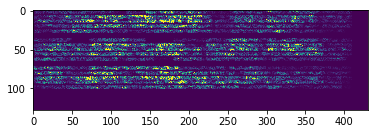

In [84]:
target_example = 33  # Snake
# (original_image, prep_img, target_class, file_name_to_export, pretrained_model) =\
#     get_example_params(target_example)
prep_img, target_class =get_example_params()
prep_img = np.expand_dims(prep_img, axis=0)
prep_img = np.expand_dims(prep_img, axis=0)
prep_img = torch.from_numpy(prep_img)
prep_img = Variable(prep_img, requires_grad=True)
# Guided backprop
GBP = GuidedBackprop(model)
# Get gradients
guided_grads = GBP.generate_gradients(prep_img, target_class)
guided_grads = convert_to_grayscale(guided_grads)
# Save colored gradients
save_gradient_images(guided_grads, '_Guided_BP_color', False)
# # Convert to grayscale
# grayscale_guided_grads = convert_to_grayscale(guided_grads)
# # Save grayscale gradients
# save_gradient_images(grayscale_guided_grads, file_name_to_export + '_Guided_BP_gray')
# # Positive and negative saliency maps
# pos_sal, neg_sal = get_positive_negative_saliency(guided_grads)
# save_gradient_images(pos_sal, file_name_to_export + '_pos_sal')
# save_gradient_images(neg_sal, file_name_to_export + '_neg_sal')
# print('Guided backprop completed')

## t-sne

In [18]:
import os
from torch.utils.data import Dataset, DataLoader

sel_cls = [5, 33, 34, 6, 10]
# rootpath = "//Users//xixi//Documents/gatech/8803DDL/proj/deep-audio-master/src/ESC-50/data2"
# t = [x[0] for x in os.walk(rootpath)]
# t
class visset(Dataset):
    def __init__(self):
        
        rootpath = "//Users//xixi//Documents/gatech/8803DDL/proj/deep-audio-master/src/ESC-50/data2"
        self.data_list = []
        self.label_list = []
        for dir in os.walk(rootpath):
            if dir[0].split("/")[-1][:5]=="class" and int(dir[0].split("/")[-1][5:]) in sel_cls:
                cls = int(dir[0].split("/")[-1][5:])
                for root, _dir,files in os.walk(dir[0]):
                    for file in files:
                        if file.find('.npy')!= -1:
#                             print(root, dir[0], file)
                            self.data_list.append(os.path.join(root, file))
#                             print(os.path.join(root, file))
                            self.label_list.append(cls)
        print(len(self.data_list), len(self.label_list))
            
#         for root, dir, files in os.walk(rootpath):
#             print(root,dir)
#             for file in files:
#                 if file.find('.npy')!= -1:
#                     self.data_list.append(os.path.join(root, file))
#                     self.label_list.append(int(root.split('/')[-1][5:]))
        print(len(self.data_list), len(self.label_list))
        
    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, index):

        path = self.data_list[index]
#         print(path)
#         data = []
#         label = []
        data = np.load(path,allow_pickle = True)
        data = np.expand_dims(data, axis=0)
#         data = np.asarray(Image.open(path))
        label= self.label_list[index] 
#         print(data.shape)
#         data = np.asarray(data)
        label = np.asarray(label)
#         print(data,label)
        return data, label

dataset  = visset()
# data,label = dataset.__getitem__(5)
loader = torch.utils.data.DataLoader(dataset, batch_size=40)
result = []
result_0 = []
layers = [(*list(model.children()))]

for i, data in enumerate(loader, 0):
    
    inputs, labels = data
    result_0.append(inputs.view(inputs.shape[0], -1).detach().cpu().numpy())
#     inputs = inputs.float()
#     outputs = layers[0](inputs)
#     outputs = layers[1](outputs)
#     outputs = F.relu(outputs)
#     outputs = layers[2](outputs)
#     outputs = layers[3](outputs)
#     outputs = layers[4](outputs)
#     outputs = F.relu(outputs)
#     outputs = layers[5](outputs)
#     outputs = layers[6](outputs)
#     outputs = layers[7](outputs)
#     outputs = F.relu(outputs)
#     outputs = outputs.view(outputs.shape[0], -1)
#     result.append(outputs.detach().cpu().numpy())

# print(result_0)
result_0 = np.concatenate(result_0)
# result = np.concatenate(result)

200 200
200 200


In [ ]:
from sklearn.manifold import TSNE
list_perp = [5, 15, 45, 65, 85]
list_lr = [50,100,200]
# list_perp = [5,]
# list_lr = [50]
list_embedded = []
for prep in list_perp:
    for lr in list_lr:
        embedded = TSNE(perplexity=prep, learning_rate=lr,n_iter=2000).fit_transform(result)
        list_embedded.append(embedded)

list_embedded = np.array(list_embedded)
np.save("./datafile.npy", list_embedded)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("./datafile.npy")
data.shape

(15, 200, 2)

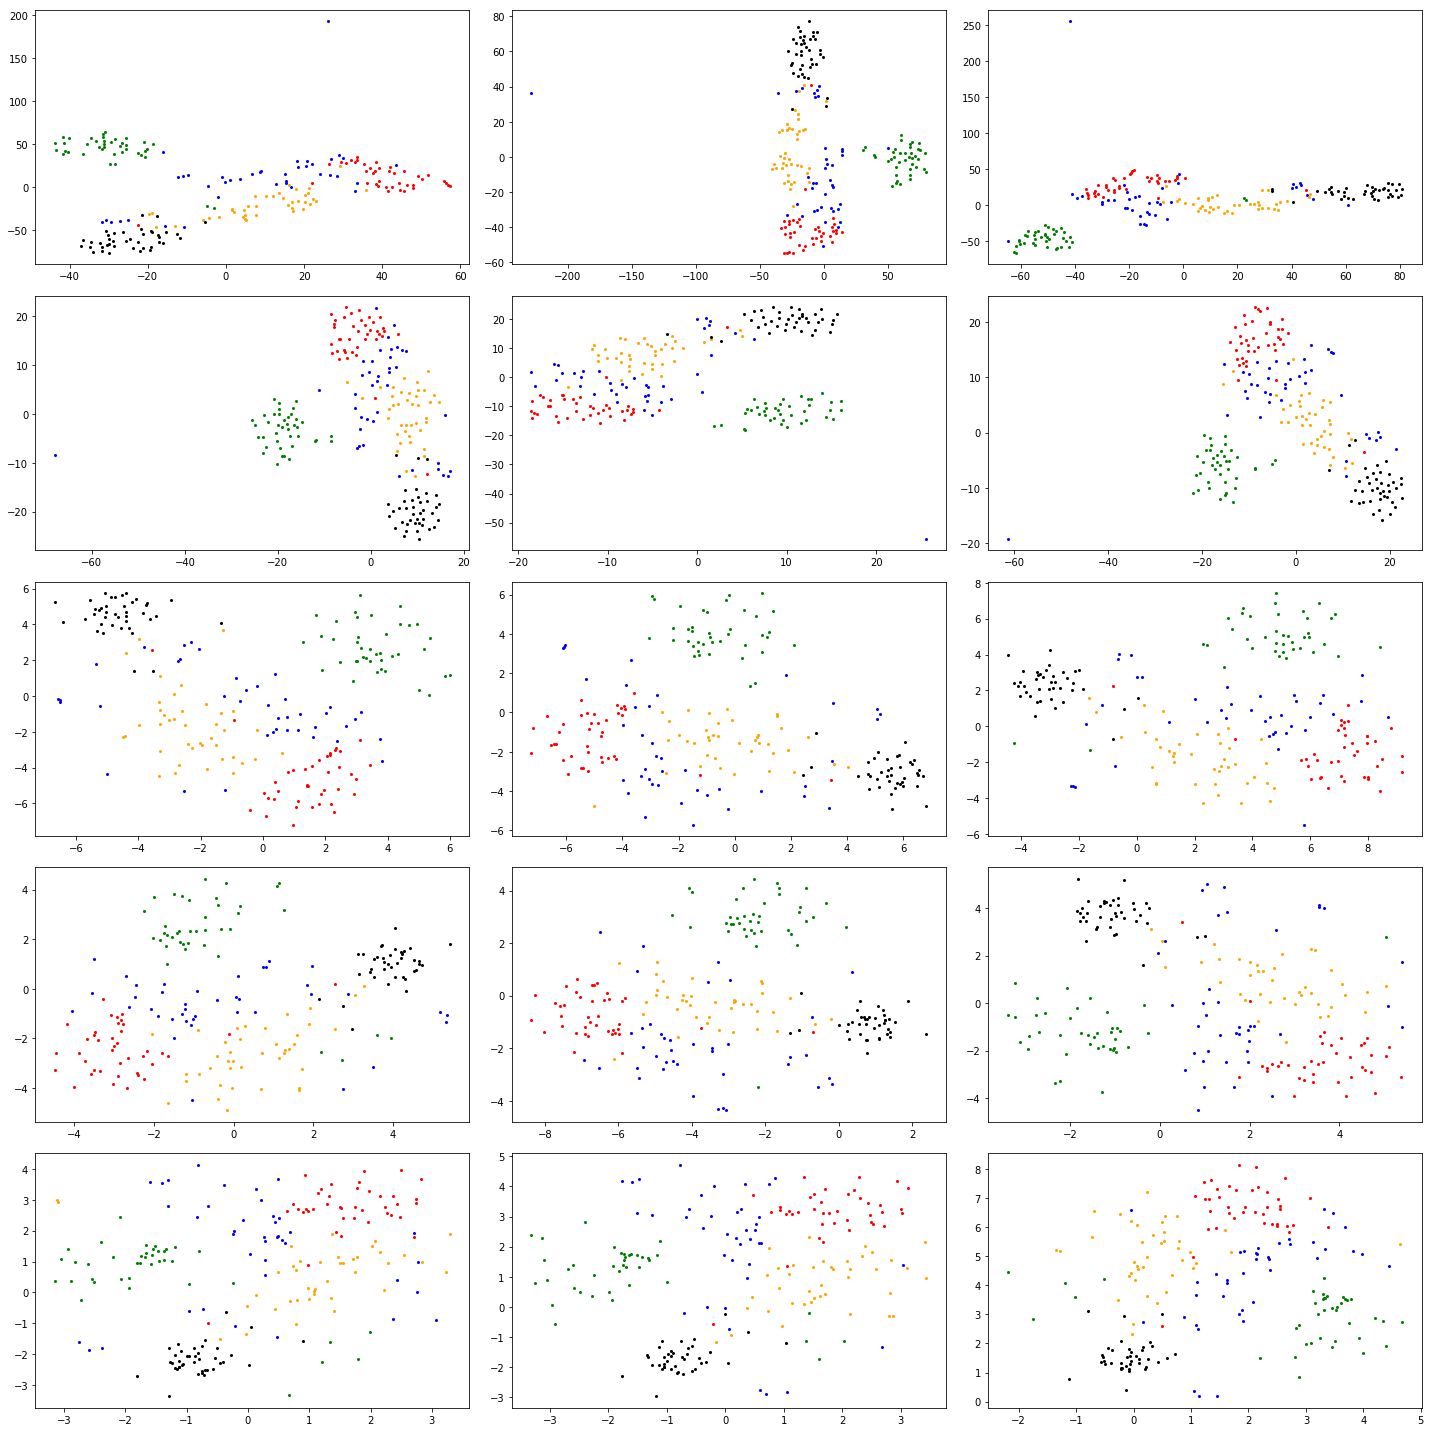

In [102]:
fig = plt.figure(figsize=(20, 20))

num_sample = 40
for num in range(len(data)):
    ax = fig.add_subplot(5,3,num+1)
    colors = []
    for c in ['red', 'green', 'blue', 'orange', 'black']:
        for j in range(40):
            colors.append(c)

    for x, y, co in zip(data[num][:,0], data[num][:,1], colors):
        ax.plot(x, y, c=co, marker="o", markersize=2)
    
plt.tight_layout()
plt.show()

In [23]:
from sklearn.decomposition import PCA

## original images
dataset  = visset()
pca = PCA(n_components=50)
ssss = pca.fit_transform(result_0)

200 200
200 200


In [25]:
from sklearn.manifold import TSNE
list_perp = [5, 15, 45, 65, 85]
list_lr = [50,100,200]
# list_perp = [5,]
# list_lr = [50]
list_embedded = []
for prep in list_perp:
    for lr in list_lr:
        embedded = TSNE(perplexity=prep, learning_rate=lr,n_iter=2000).fit_transform(ssss)
        list_embedded.append(embedded)

list_embedded = np.array(list_embedded)
np.save("./datafile_0.npy", list_embedded)

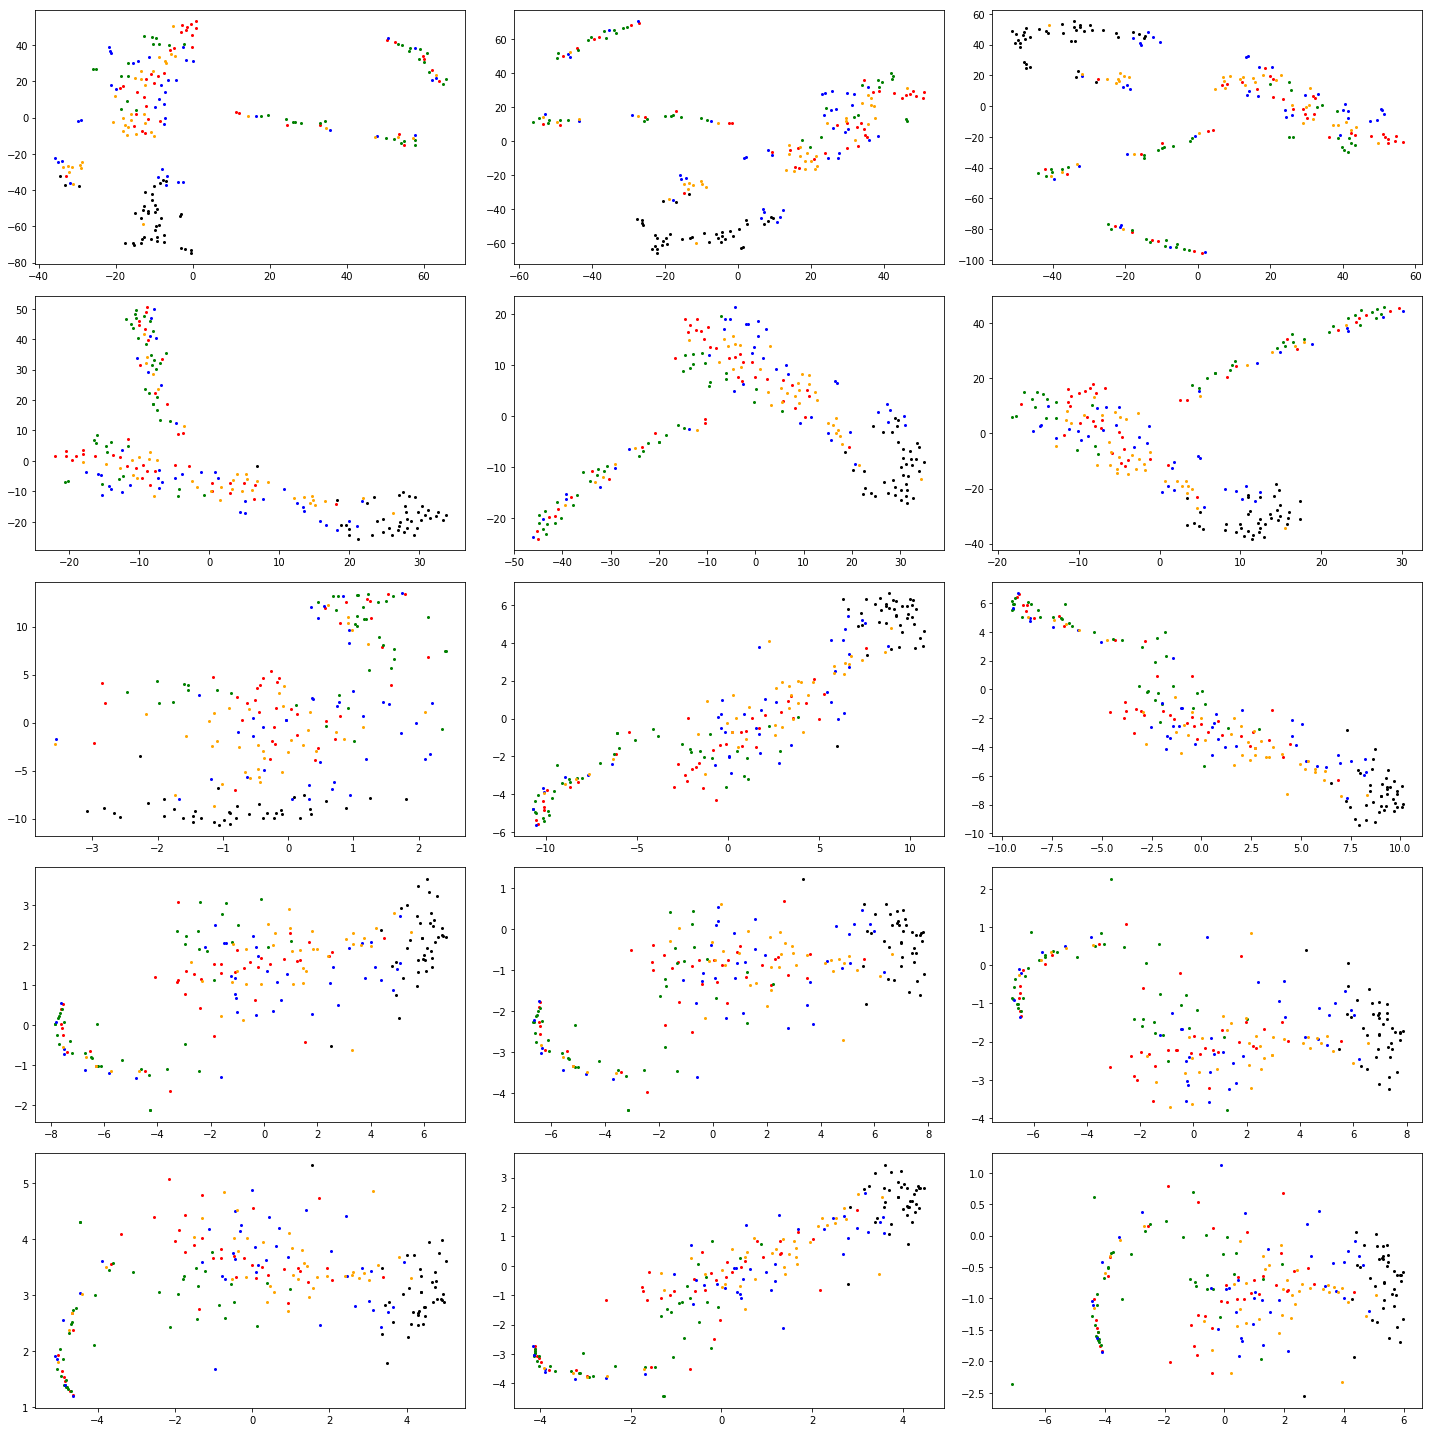

In [26]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("./datafile_0.npy")
data.shape
fig = plt.figure(figsize=(20, 20))

num_sample = 40
for num in range(len(data)):
    ax = fig.add_subplot(5,3,num+1)
    colors = []
    for c in ['red', 'green', 'blue', 'orange', 'black']:
        for j in range(40):
            colors.append(c)

    for x, y, co in zip(data[num][:,0], data[num][:,1], colors):
        ax.plot(x, y, c=co, marker="o", markersize=2)
    
plt.tight_layout()
plt.show()

## Occlusion

In [29]:
# Predict probabilities for given test image using trained model
def pred_prob_list(model, test_image):
    test_image = np.expand_dims(test_image, axis=0)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = torch.from_numpy(test_image)
    test_image = Variable(test_image, requires_grad=False)
    
#     test_image = preprocess_input(test_image)
    predictions = model(test_image)
#     print(predictions)
    return predictions

In [33]:
import argparse
import math
import time
import cv2

import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def get_occ_imgs(img, img_size, occ_size, occ_pixel, occ_stride, classes):
 
    img_path = "../input_images/1-51805-C-33.npy"
    class_index = int(classes)
    # Index of class with highest probability
#     class_index = np.argmax(classes)
#     print('True class index:', class_index)
    image = np.load(img_path)
    output_height = int(math.ceil((img_size[0] - occ_size) / occ_stride + 1))
    output_width = int(math.ceil((img_size[1] - occ_size) / occ_stride + 1))
    print('Total iterations:', output_height, '*', output_width, '=', output_height * output_width)

    # Initialize probability heatmap and occluded images
    temp_img_list = []
    prob_matrix = np.zeros((output_height, output_width))

    start = time.time()

    for h in range(output_height):
        for w in range(output_width):
            # Occluder window:
            h_start = h * occ_stride
            w_start = w * occ_stride
            h_end = min(img_size[0], h_start + occ_size)
            w_end = min(img_size[1], w_start + occ_size)

            # Getting the image copy, applying the occluding window and classifying it:
            occ_image = image.copy()
            occ_image[h_start:h_end, w_start:w_end] = occ_pixel
            predictions = pred_prob_list(model, occ_image.copy())[0]
#             print(predictions)
            prob = predictions[class_index].detach().numpy()

            # Collect the probability value in a matrix
            prob_matrix[h, w] = prob

            # Collect occluded images   
            occ_image = np.array(occ_image)
            occ_image[h_start:h_end, w_start:w_end] = (1-prob)*255
#             cv2.putText(img=occ_image, text=str(round(prob,4)), org=(w_start, int(h_start + (h_end - h_start) / 2)),
#                         fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.3, color=(255*(1-prob),255*(1-prob),255*(1-prob)), thickness=1)  
#             cv2.imwrite('occ_exp/video/'+img_name+str(h*output_width+w+1).zfill(6)+'.png',occ_image) 
            
#             # To save occluded images as a video, run the following shell command
#             """ffmpeg -framerate 5 -i occ_exp/video/<img_name>%06d.jpg -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p occ_exp/<img_name>.mp4"""

            temp_img_list.append(occ_image)

        print('Percentage done :', round(((h + 1) * output_width) * 100 / (output_height * output_width), 2), '%')

    end = time.time()
    elapsed = end - start
    print('Total time taken:', elapsed, 'sec\tAverage:', elapsed / (output_height * output_width), 'sec')

    # Save probabilities and all occluded images in one
#     np.save('occ_exp/probs_' + img_name + '.npy', prob_matrix)
    np.save('./dddd1.npy', prob_matrix)
    # save_occs(temp_img_list, img_size, img_size, img_path.split('/')[-1])

    return prob_matrix



img_path = "../input_images/1-51805-C-33.npy"
img_size = (128,431)
# args = get_args()

# img_name = img_path.split('/')[-1].split('.')[0]
occ_size = 40
occ_pixel = 0
occ_stride = 5

# Input pre-trained model, defined in model.py
# model = torch.load("../CNN_Non_Hierarchical.pt")
model = torch.load("../model_40.pt",map_location=torch.device('cpu'))
input_image = np.load(img_path)

# # Get probability list and print top 5 classes
result = pred_prob_list(model, input_image)[0]
idx = (-result).argsort()[:5]

# # Start occlusion experiment and store predicted probabilities in a file
# print('Running occlusion iterations (Class:', de_result[0][1], ') ...\n')
probs = get_occ_imgs(img_path, img_size, occ_size, occ_pixel, occ_stride, idx[0])

# # Get probabilities and apply regularization
# print('\nGetting probability heat-map and regularizing...')
# probs = np.load('occ_exp/probs_' + img_name + '.npy')
# heat = regularize(probs, args.norm, args.percentile)

# # Project heatmap on original image
# print('\nProject the heat-map to original image...')
# aug = join(heat, img_path, img_size, occ_size)

# print('\nDone')

Total iterations: 19 * 80 = 1520
Percentage done : 5.26 %
Percentage done : 10.53 %
Percentage done : 15.79 %
Percentage done : 21.05 %
Percentage done : 26.32 %
Percentage done : 31.58 %
Percentage done : 36.84 %
Percentage done : 42.11 %
Percentage done : 47.37 %
Percentage done : 52.63 %
Percentage done : 57.89 %
Percentage done : 63.16 %
Percentage done : 68.42 %
Percentage done : 73.68 %
Percentage done : 78.95 %
Percentage done : 84.21 %
Percentage done : 89.47 %
Percentage done : 94.74 %
Percentage done : 100.0 %
Total time taken: 76.18165707588196 sec	Average: 0.050119511234132864 sec


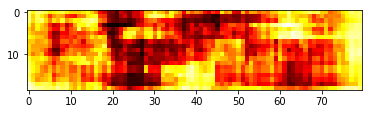

In [34]:
img = np.load("./dddd1.npy")
plt.cla()
# fig, (ax1) = plt.subplots(figsize=(6, 3))
ax1 = plt.imshow(img, "hot")
# fig.colorbar(ax1)

plt.savefig("../output/ddd.jpg")